## MIDS UC Berkeley, Machine Learning at Scale
## DATSCIW261 ASSIGNMENT #6

Names Safyre Anderson, Howard Wen , Vamsi Sakhamuri

Emails safyre@berkeley.edu, howard.wen1@gmail.com, vamsi@ischool.berkeley.edu

Time of Initial Submission: February 18th, 2016 8am PST

Section W261-3, Spring 2016

Week 6 Homework


### HW6.0. 

*In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.*

From the async: **Mathematical Optimization** select of the best element with regard to some criteria from a set of available alternatives. Simply put, given a range of values we'd like to optimize on(often in our case, model coefficients/ weights) we choose the value(s) that get us closest to our optimization critera. This could mean achieving the lowest error or the highest information purity, for instance.

The **objective function** (or loss function/ cost function) is a function that we aim to maximize or minimize (usually minimize) in order to determine what input values we should use in our model. Examples of an objective function include the mean-squared error, various variance functions.

### HW6.1 
**Optimization theory:**

*For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function* 
*$X^3 - 12x^2-6$ defined over the real  domain $-6$ to $+6$.* 

*Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.*

*For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?*

**First Order Optimization Conditions (FOC)** Given an objective function ($J(\Theta)$) that we would like to solve, the FOCs are that the first order (partial) derivative(s) ($\frac{\partial J(\Theta)}{\partial \theta}$) have roots:
$\frac{\partial J(\Theta = \Theta^*)}{\partial \theta} = 0$.

For the multivariate case, we look to see if the **gradient function** reaches 0.


Which basicially means if we want to optimize our objective function, it needs local minima and/or maxima to optimize on. If there aren't any extremes, we will never find an optimal set of parameters.

**Second Order Optimization Conditions (SOC)**
Given that our FOCs are met, then we look at the second derivatives to determine the type of extreme we've identified at the roots. If the second derivative

- Maximum 
$\frac{\partial J(\Theta = \Theta^*)}{\partial^2 \Theta} > 0$ Then the extreme is a local maximum at $\Theta^*$.

For the multivariate case, we check if the Hessian is negative definite (eigen-values are negative) at the root of the gradient to see if the extreme is a maximum (**concave**).

- Minimum 
$\frac{\partial J(\Theta= \Theta^*)}{\partial^2 \Theta} < 0$ Then the extreme is a local minimum at $\Theta^*$.

For the multivariate case, we check if the Hessian is positive definite (eigen-values are positive) at the root of the gradient to see if the extreme is a minimum (**convex**).

$\frac{\partial J(\Theta= \Theta^*)}{\partial^2 \Theta} = 0$ Then there aren't extremes (there is no change in slope in the first derivative.

**Hessian Matrix** The Hessian is a matrix of second order partial derivatives for each weight with respect to the objective function. Each second partial is obtained from $f(x)$ by taking the partial derivative of $x_i$ and taking that derivative with respect to $x_j$. On the diagonal of the Hessian, $i=j$.




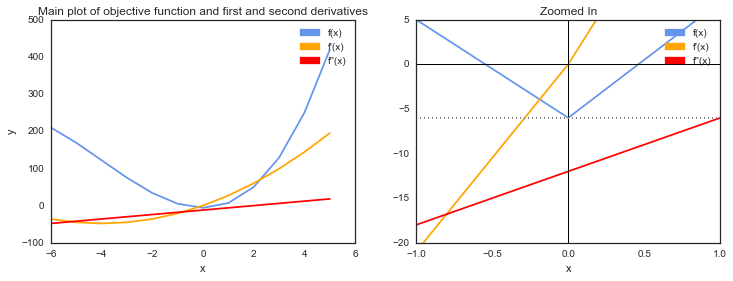

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re,math
import matplotlib.patches as mpatches
%matplotlib inline

x = range(-6,6)
y = [i**3 + 12*i**2 - 6 for i in x]
y_prime = [3*i**2 +24*i for i in x]
y_double = [6*i -12 for i in x]


color = 'cornflowerblue'
points = np.ones(5)  # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'times'})


# styling
sns.set(style="white", palette="muted", color_codes=True)
# Plot all line styles.
plt.figure(figsize = (12, 4))
y_patch = mpatches.Patch(color='cornflowerblue', label='f(x)' )
yy_patch = mpatches.Patch(color='orange', label='f\'(x)' )
yyy_patch = mpatches.Patch(color='red', label='f\'\'(x)' )

# begin plots
# whole figure
plt.subplot(1,2,1)
plt.plot(x, y, 'cornflowerblue')
plt.plot(x, y_prime, 'orange')
plt.plot(x, y_double, 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(handles=[y_patch,yy_patch,yyy_patch])
plt.title("Main plot of objective function and first and second derivatives")

# zoom in a bit to see the extreme 
plt.subplot(1,2,2)
plt.plot(x, y, 'cornflowerblue')
plt.plot(x, y_prime, 'orange')
plt.plot(x, y_double, 'red')
plt.axvline(x = 0, color = 'black', lw = 1) #not the actual root, but close enough
plt.axhline(y = -6, color = 'gray', lw = 2, linestyle= ':') #not the actual root, but close enough
plt.axhline(y = 0, color = 'black', lw = 1) #not the actual root, but close enough
plt.xlabel("x")
plt.legend(handles=[y_patch,yy_patch,yyy_patch])
plt.xlim(-1,1)
plt.ylim(-20,5)
plt.title("Zoomed In")
#plt.show()



From eyeballing the graphs it appears the local extreme occurs at (0, -6). For easier determination, I added lines at x = 0, y = 0, and y = -6. Our FOC has been met: $f'(x)$ (orange) crosses 0, therefore we can conclude there is an extrema. To determine the type of extreme, we evaluate our SOC: $f''(x) < 0$ (red). Therefore or extreme is a minima.

### HW6.2

*Taking $x=1$ as the first approximation($x^{t_1}$) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as $x^{t_2}$) of this root. (Hint the solution is $x^{t_2}=1.2$)*

First find the slope of the tangent at x = 1 by evaluating the gradient at that point.

$f'(x) = \frac{d f(x)}{dx} = 3x^2 +2$

$f(x^{t_1}=1) = 1 +2 -4 = -1$

$f'(x^{t_1} =1) = 3 + 2 = 5$

Solve for $x^{t_2}$:

$ 5 = \frac{f(x=1) - 0}{(x=1) - x^{t_2}} $

$x^{t_2} = \frac{5}{5-1} = 1.2 $ 

### HW6.3 Convex optimization 
*What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?*



- A convex problem refers to an optimization problem where the objective function is convex and it's set of values (x, y) are all "connected". In other words, a convex set is continuous between each pair of x and y.

- In convex optimization, the first order condition for convexity is met when the objective function ($f(x)$) is globally above its tangent evaluated at any $x$ in the domain of $f$. In other words,

    - $f(y) \le f(x) + \nabla f(y)^T (y-x)$ for all $x$, $y$ $\in \texttt{dom}~ f$ 
    
    and
    
    - $\nabla f(x) = 0$
    
- The second order condition for convexity only applies if $f(x)$ is twice differentiable:
    - $ \nabla^2 f(x) \succeq 0$ or $\nabla^2 f(x) \succ 0$ for strongly convex functions.
    
    However, this is not necessary for us to know that a local minima is a global minima. If a problem is convex and the FOC is met, then we know that the second order derivative has a direction.

**Fill in the BLANKS here:**
*Convex minimization, a subfield of optimization, studies the problem of minimizing* **CONVEX** *functions over* **CONVEX** *sets. The* **CONVEXITY** *property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.*

### HW 6.4

*The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:*

$\frac{1}{2} \sum_i^m (w_i (\mathbf{\beta} \cdot \mathbf{x}_i - y_i)^2)$ :Where $i$ is a training example in a set of $1,2,...m$ examples.

*Where training set consists of input variables $\mathbf{x}_i$ ( in vector form) and a target variable $y$, and $\mathbf{\beta}$ is the vector of coefficients ($\beta_i$) for the linear regression model.*

*Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.*

The gradient of a summation is simply a vector of partial derivatives, we can just take the term inside the summation and evaluate that partial derivative with respect to the coefficients.

First we want to treat $x_i$ as a 1x2 vector of [1, $x_i$]. Therefore the dot product of $beta$ and $x_i$ will reflect the equation for a line ($\beta_0(1) + \beta_1x$). Our new objective function should look something like this:

$\frac{1}{2} \sum_i^m w_i (\beta_0 (1) +\beta_1 x_i - y_i)^2)$

Next to determine the gradient, we need to take the partial derivatives with respect to both coefficients. The weight is a constant, so it gets pulled out of the derivative.

- For $\beta_0$:

    - $\frac{1}{2} \sum_i^m w_i \frac{(\beta_0 +\beta_1 x_i - y_i)^2)}{\partial \beta_0}$ = $\frac{2}{2} \sum_i^m w_i (\beta_0 +\beta_1 x_i - y_i)(1)$
    
    
- For $\beta_1$ :

    - $\frac{1}{2} \sum_i^m w_i \frac{(\beta_1 +\beta_1 x_i - y_i)^2)}{\partial \beta_1}$ = $\frac{2}{2} \sum_i^m w_i (\beta_0 +\beta_1 x_i - y_i)(x_i)$

With the gradients derived, we can plug them into the update functions for gradient descent (For 2D):


$\beta_0^{i+1} := \beta_0^{i} + \alpha \frac{1}{m} \sum_i^m w_i (\beta_0 +\beta_1 x_i - y_i)$

$\beta_1^{i+1} := \beta_1^{i} +  \alpha \frac{1}{m} \sum_i^m  w_i (\beta_0 +\beta_1 x_i - y_i)x_i$

$\therefore$





## HW 6.5
*Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.*

*Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb*

*Weight each example as follows: *

`weight(x)= abs(1/x)`

*Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)*

*Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.*


**Generate sample data**

In [2]:
%matplotlib inline
import numpy as np
import pylab 
from numpy.random.mtrand import poisson
print 
# number of points
size = 1000000

# try to add some extra variance to produce heteroscedasticity
x = np.random.uniform(-4, 4, size)+poisson([5]*size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)  

# save the coordinates of each point
data = zip(x,y)
np.savetxt('/Users/Safyre/Documents/1000000_WeightedLinearRegression.csv',data,delimiter = ",")

# save a sample of 1000
shuffle = np.random.permutation(np.arange(x.shape[0]))
x, y = x[shuffle], y[shuffle]
sample_data = zip(x[:1000], y[:1000])
np.savetxt('/Users/Safyre/Documents/1000_WeightedLinearRegression.csv',sample_data,delimiter = ",")

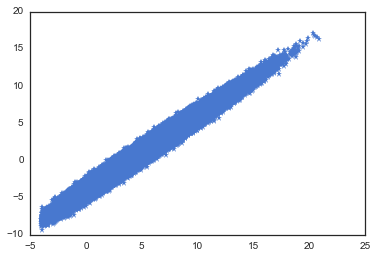

In [3]:
# pretty!
pylab.plot(x, y, '*')
pylab.show()

**MR Job Code adapted from example**

In [4]:
%%writefile MrJobBatchGDUpdate_WeightedLinearRegression.py
from mrjob.job import MRJob

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MrJobBatchGDUpdate_WeightedLinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open('weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        
        # tuple of floats for x, y
        D = (map(float,line.split(',')))
        
        # Since 1/x is the weight, lets put a limit on how small x can get
        # to avoid underflow.
        if D[0] <0.001:
            D[0] = 0.001
        
        # create this sample's weight
        w = abs(1/D[0])
        
        # y_hat is the predicted value given current weights
        # y = mx + b
        y_hat = self.weights[0]+self.weights[1]*D[0]
        
        # Update parial gradient vector with gradient from current example
        # the gradient will have one value per coefficient m, b
        # This is where we also apply the weight 1/x
        self.partial_Gradient =  [self.partial_Gradient[0]+ w*(D[1]-y_hat), self.partial_Gradient[1] + w*(D[1]-y_hat)*D[0]]
        self.partial_count = self.partial_count + 1
        #yield None, (D[0]-y_hat,(D[0]-y_hat)*D[1],1)
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
            
        # this is the sum and 1/m term in the gradient descent function
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [self.mr(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Overwriting MrJobBatchGDUpdate_WeightedLinearRegression.py


**Driver Code Adapted from Example**

In [5]:
from numpy import random,array
from MrJobBatchGDUpdate_WeightedLinearRegression import MrJobBatchGDUpdate_WeightedLinearRegression

# decreased the learning rate, increased the stopping criteria
learning_rate = 0.01
stop_criteria = 0.000005

# Generate random values as inital weights
# one each for β0 and β1, between -3 and 3.
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_WeightedLinearRegression(args=['/Users/Safyre/Documents/1000_WeightedLinearRegression.csv', '--file=weights.txt'])
# Update centroids iteratively
i = 0
while(1):
    print "iteration = "+str(i)+" weights = ",weights ,"\n"
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        # updates for each coeffiecient in this format
        # 1/m* total_gradient(b_0), 1/m* total_gradient(b_1)
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
    
    # Stop if we don't converge even after all the samples are done
    if np.isnan(weights).any():
        break
        
print "Final weights\n"
print weights

iteration = 0 weights =  [-1.4775437  -2.87775328] 

iteration = 1 weights = 

 [-3.88400434 -2.71195102] 

iteration = 2 weights =  [-4.66904674 -2.53029406] 

iteration = 3 weights = 

 [-4.92642118 -2.34978167] 

iteration = 4 weights =  [-5.01201039 -2.17563384] 

iteration = 5 weights = 

 [-5.04161405 -2.00925327] 

iteration = 6 weights =  [-5.05291485 -1.85081522] 

iteration = 7 weights = 

 [-5.05817803 -1.70010943] 

iteration = 8 weights =  [-5.06139843 -1.5568134 ] 

iteration = 9 weights = 

 [-5.06387974 -1.42058066] 

iteration = 10 weights =  [-5.06604981 -1.29106885] 

iteration = 11 weights = 

 [-5.06805137 -1.16794829] 

iteration = 12 weights =  [-5.06993414 -1.05090419] 

iteration = 13 weights = 

 [-5.07171749 -0.93963685] 

iteration = 14 weights = 

 [-5.07341071 -0.83386122] 

iteration = 15 weights =  [-5.07501966 -0.73330629]

 

iteration = 16 weights =  [-5.07654898 -0.63771437] 

iteration = 17 weights = 

 [-5.07800274 -0.54684052] 

iteration = 18 weights =  [-5.07938473 -0.46045187] 

iteration = 19 weights = 

 [-5.0806985  -0.37832705] 

iteration = 20 weights =  [-5.08194743 -0.3002556 ] 

iteration = 21 weights = 

 [-5.08313471 -0.22603748] 

iteration = 22 weights =  [-5.08426339 -0.1554825 ] 

iteration = 23 weights = 

 [-5.08533636 -0.08840985] 

iteration = 24 weights =  [-5.08635638 -0.02464766] 

iteration = 25 weights = 

 [-5.08732605  0.03596747] 

iteration = 26 weights =  [-5.08824786  0.09359085] 

iteration = 27 weights = 

 [-5.08912418  0.14837015] 

iteration = 28 weights =  [-5.08995724  0.20044575] 

iteration = 29 weights = 

 [-5.09074919  0.24995108] 

iteration = 30 weights =  [-5.09150205  0.29701301]

 

iteration = 31 weights = 

 [-5.09221775  0.34175214] 

iteration = 32 weights = 

 [-5.09289812  0.38428311] 

iteration = 33 weights =  [-5.09354492  0.42471491] 

iteration = 34 weights = 

 [-5.09415979  0.46315114] 

iteration = 35 weights = 

 [-5.09474431  0.4996903 ] 

iteration = 36 weights =  [-5.09529999  0.53442602] 

iteration = 37 weights = 

 [-5.09582824  0.56744731] 

iteration = 38 weights =  [-5.09633041  0.59883879] 

iteration = 39 weights = 

 [-5.0968078  0.6286809] 

iteration = 40 weights =  [-5.09726163  0.65705012] 

iteration = 41 weights = 

 [-5.09769306  0.68401913] 

iteration = 42 weights =  [-5.09810319  0.70965705] 

iteration = 43 weights = 

 [-5.09849308  0.73402958] 

iteration = 44 weights =  [-5.09886373  0.75719917] 

iteration = 45 weights = 

 [-5.09921609  0.77922519] 

iteration = 46 weights =  [-5.09955105  0.80016409] 

iteration = 47 weights = 

 [-5.09986948  0.82006953] 

iteration = 48 weights = 

 [-5.1001722  0.8389925] 

iteration = 49 weights = 

 [-5.10045997  0.8569815 ] 

iteration = 50 weights =  [-5.10073354  0.87408264] 

iteration = 51 weights = 

 [-5.10099361  0.89033972] 

iteration = 52 weights = 

 [-5.10124084  0.90579441] 

iteration = 53 weights = 

 [-5.10147587  0.92048632] 

iteration = 54 weights = 

 [-5.1016993   0.93445309] 

iteration = 55 weights =  [-5.1019117   0.94773051]

 

iteration = 56 weights =  [-5.10211362  0.9603526 ] 

iteration = 57 weights = 

 [-5.10230557  0.97235171] 

iteration = 58 weights = 

 [-5.10248805  0.9837586 ] 

iteration = 59 weights =  [-5.10266152  0.99460248] 

iteration = 60 weights = 

 [-5.10282643  1.00491114] 

iteration = 61 weights =  [-5.1029832   1.01471101]

 

iteration = 62 weights = 

 [-5.10313223  1.02402719] 

iteration = 63 weights = 

 [-5.10327391  1.03288356] 

iteration = 64 weights =  [-5.10340859  1.04130281] 

iteration = 65 weights = 

 [-5.10353663  1.04930652] 

iteration = 66 weights = 

 [-5.10365835  1.05691519] 

iteration = 67 weights =  [-5.10377406  1.06414833] 

iteration = 68 weights = 

 [-5.10388405  1.07102447] 

iteration = 69 weights =  [-5.10398862  1.07756122] 

iteration = 70 weights = 

 [-5.10408803  1.08377535] 

iteration = 71 weights =  [-5.10418254  1.08968277] 

iteration = 72 weights = 

 [-5.10427237  1.09529862] 

iteration = 73 weights =  [-5.10435778  1.10063729] 

iteration = 74 weights = 

 [-5.10443897  1.10571246] 

iteration = 75 weights =  [-5.10451615  1.11053715] 

iteration = 76 weights = 

 [-5.10458952  1.1151237 ] 

iteration = 77 weights =  [-5.10465927  1.11948388] 

iteration = 78 weights = 

 [-5.10472558  1.12362886] 

iteration = 79 weights =  [-5.10478861  1.12756925] 

iteration = 80 weights = 

 [-5.10484854  1.13131516] 

iteration = 81 weights =  [-5.1049055   1.13487619] 

iteration = 82 weights = 

 [-5.10495966  1.13826146] 

iteration = 83 weights =  [-5.10501114  1.14147964] 

iteration = 84 weights = 

 [-5.10506008  1.14453899] 

iteration = 85 weights = 

 [-5.10510661  1.14744734] 

iteration = 86 weights = 

 [-5.10515084  1.15021214] 

iteration = 87 weights =  [-5.10519288  1.15284048] 

iteration = 88 weights = 

 [-5.10523285  1.1553391 ] 

iteration = 89 weights = 

 [-5.10527085  1.15771439] 

iteration = 90 weights = 

 [-5.10530697  1.15997245] 

Final weights

[-5.10534131  1.16211906]


In [ ]:
# Comparison with scikit-learn

The MapReduce Job converged after 90 iterations with final weights = [-5.105, 1.162] (rounded). 

In [6]:
#!/usr/bin/env python
## compare performance of sklearn weighted-OLS
import numpy as np
from sklearn.linear_model import LinearRegression

# prepare the data
x_train = [i for i, j in sample_data]
y_train = [j for i, j in sample_data]
weights = [abs(float(1)/i) for i, j in sample_data]

x_train = np.array(x_train)
y_train = np.array(y_train)
weights = np.array(weights)

wols = LinearRegression()
wols.fit(X = x_train, y =y_train)
#wols.fit(X = x_train, y =y_train, sample_weight = weights)

ValueError: numpy.dtype has the wrong size, try recompiling

In [ ]:
for i in x_train: print x
    